In [267]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [177]:
# Read in probability data
prob_df = pd.read_csv('CRISPR_gene_dependency 3.06.36 PM.csv')
# Read in labels
label_df = pd.read_csv('sample_info.csv').reset_index()


# Select desired labels only
label_df = label_df[['DepMap_ID', 'lineage', 'sex']]

In [178]:
# Combine labels with probablities
combined_df = pd.merge(prob_df, label_df, left_on='DepMap_ID', right_on='DepMap_ID')

In [179]:
combined_df

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),lineage,sex
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623,ovary,Female
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530,blood,Male
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412,blood,Male
3,ACH-000007,0.026704,0.083588,0.008853,0.011299,0.027288,0.028349,0.032573,0.166503,0.047045,...,0.011212,0.002200,0.005432,0.035241,0.138445,0.103161,0.146222,0.274833,colorectal,Male
4,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.029011,0.002816,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194,colorectal,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,ACH-002834,0.012720,0.083840,0.013308,0.013315,0.107286,0.079063,0.013340,0.717478,0.040061,...,0.022403,0.052849,0.029567,0.029711,0.024132,0.174946,0.091510,0.421153,bone,Female
1082,ACH-002847,0.058547,0.079576,0.036707,0.030234,0.069976,0.032828,0.012784,0.476383,0.096910,...,0.014249,0.018715,0.010776,0.072452,0.131375,0.115486,0.094022,0.438092,unknown,Female
1083,ACH-002874,0.169875,0.017430,0.017965,0.008615,0.117915,0.075693,0.087961,0.144152,0.140377,...,0.045149,0.044243,0.017923,0.077515,0.094231,0.166188,0.058117,0.302708,skin,Female
1084,ACH-002875,0.035519,0.099789,0.071748,0.048479,0.245413,0.154663,0.045155,0.324723,0.089083,...,0.055878,0.039710,0.017571,0.101216,0.087739,0.050947,0.182081,0.349872,skin,Male


In [180]:
combined_df.dropna(axis=0, inplace=True)

In [182]:
X = combined_df.drop(columns=['lineage', 'DepMap_ID'])
X = pd.get_dummies(X)

y = combined_df['lineage']

In [253]:
best = SelectKBest(chi2, k=50)
X_new = pd.DataFrame(best.fit_transform(X,y))
features = best.get_feature_names_out()
X_new.columns = best.get_feature_names_out()

In [223]:
X_new

,BRAF (673),CBFB (865),CTNNB1 (1499),DUSP4 (1846),FERMT2 (10979),IKZF1 (10320),IRF4 (3662),ISL1 (3670),LMO2 (4005),MBNL1 (4154),MEF2C (4208),PAX5 (5079),PAX8 (7849),POU2AF1 (5450),PPCDC (60490),RUNX1 (861),TCF7L2 (6934),TP63 (8626),sex_Female,sex_Male
0,0.594982,0.448670,0.124879,0.013829,0.408302,0.059774,0.044393,0.012814,0.047995,0.057668,0.028826,0.053509,0.996151,0.094325,0.137164,0.071672,0.024147,0.004809,1.0,0.0
1,0.024038,0.951911,0.254138,0.019049,0.026627,0.273319,0.079931,0.027814,0.965215,0.162806,0.043161,0.015581,0.096654,0.015135,0.357035,0.969345,0.046585,0.046606,0.0,1.0
2,0.017091,0.883406,0.095995,0.002988,0.358168,0.039445,0.015994,0.024724,0.445780,0.409529,0.042094,0.019045,0.009449,0.019076,0.083576,0.935865,0.033178,0.028692,0.0,1.0
3,0.028146,0.001831,0.691170,0.035232,0.118943,0.021751,0.089472,0.019284,0.004956,0.024370,0.051347,0.048988,0.057980,0.048443,0.080324,0.005627,0.763015,0.018996,0.0,1.0
4,0.032702,0.069592,0.876449,0.003848,0.334225,0.009670,0.073308,0.018441,0.011944,0.083798,0.024122,0.054523,0.136155,0.044199,0.015090,0.008104,0.570067,0.049250,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.063938,0.048692,0.031369,0.025279,0.932995,0.018248,0.019912,0.036981,0.010148,0.044370,0.071214,0.086036,0.066962,0.072557,0.006572,0.011800,0.026310,0.028660,1.0,0.0
1018,0.068649,0.001208,0.291531,0.037477,0.930620,0.014926,0.013131,0.045490,0.027252,0.050249,0.085084,0.200573,0.141830,0.066147,0.039582,0.009921,0.056484,0.038436,1.0,0.0
1019,0.978890,0.003966,0.125870,0.009688,0.477138,0.022217,0.087629,0.018972,0.043418,0.221562,0.033087,0.047966,0.057718,0.022989,0.317207,0.005058,0.171966,0.019122,1.0,0.0
1020,0.978889,0.246148,0.178757,0.975574,0.967825,0.023358,0.955974,0.014058,0.028213,0.036135,0.094610,0.018937,0.069370,0.057056,0.913136,0.015032,0.176882,0.029678,0.0,1.0


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train, y_train)

/Users/dpogrebitskiy/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [255]:
logreg.score(X_test,y_test)

0.48828125

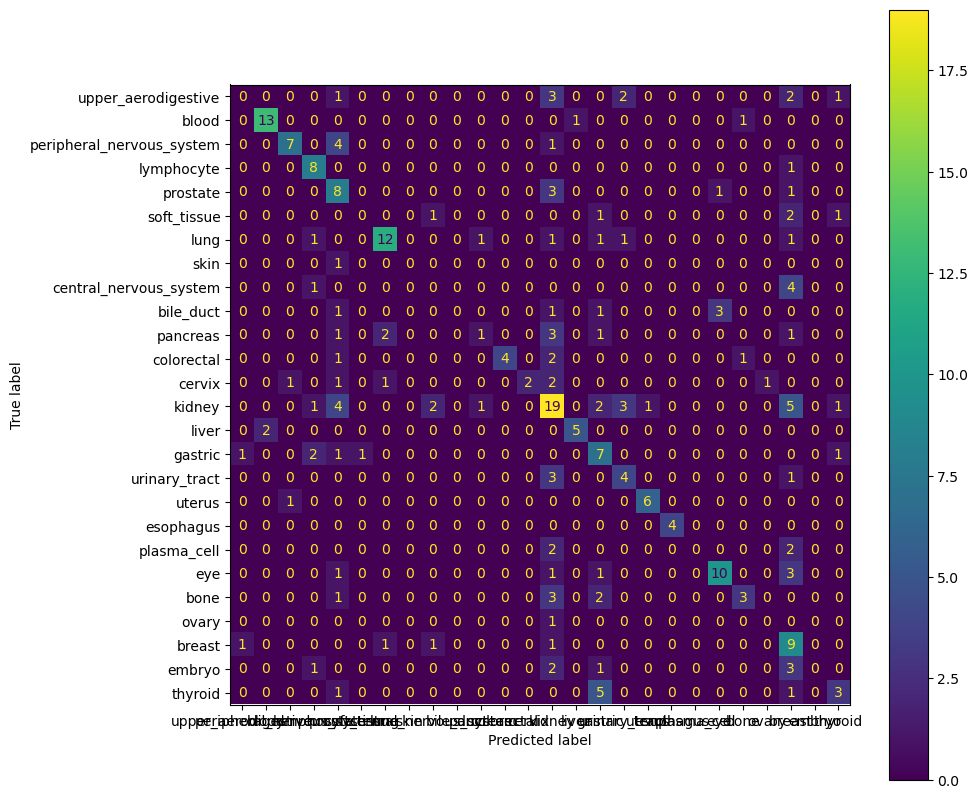

In [279]:
conf = confusion_matrix(y_true=y_test, y_pred = logreg.predict(X_test))
ConfusionMatrixDisplay(conf, display_labels=y_test.unique()).plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)

In [ ]:
combined_df.columns = map(lambda x:x.split(' ')[0], combined_df.columns)

In [256]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [257]:
knn.score(X_test,y_test)

0.42578125

In [280]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [281]:
svm.score(X_test,y_test)

0.4609375

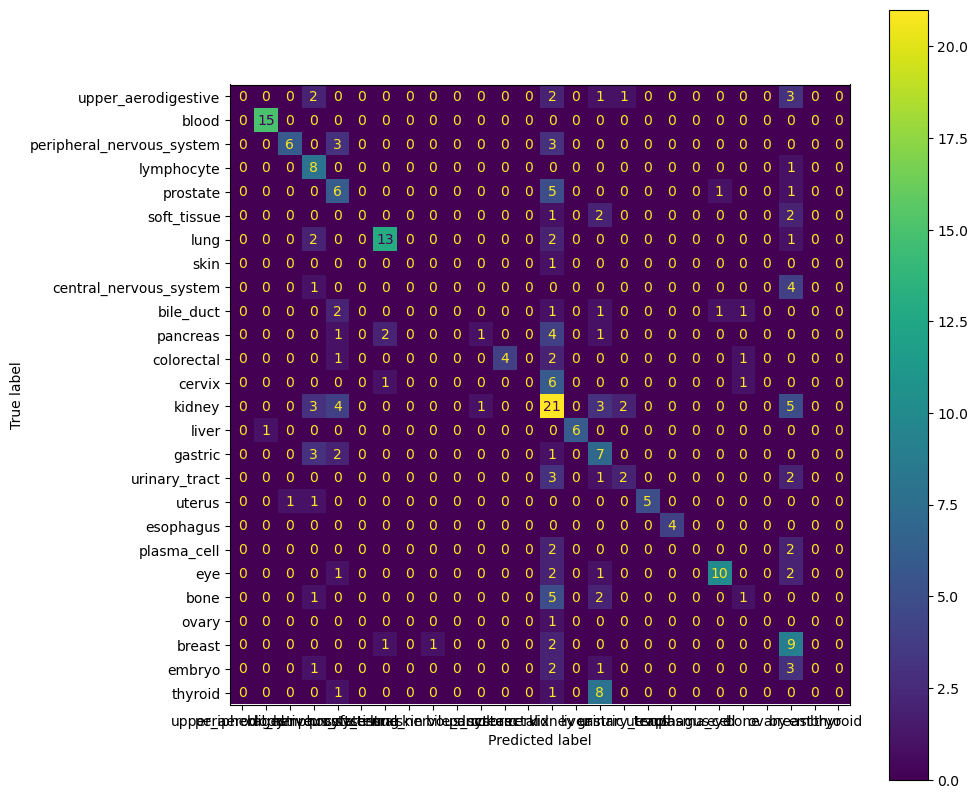

In [283]:
conf = confusion_matrix(y_true=y_test, y_pred = svm.predict(X_test))
ConfusionMatrixDisplay(conf, display_labels=y_test.unique()).plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)